Here we begin to clean the data using the data dictionary to decide on unnecessary fields, and then removing duplicates and empty rows. After doing so, we took the remaining information and created a new data frame with it.  

The .csv file can be downloaded from https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Year-To-Date-/5ucz-vwe8 under the export tab as .csv

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('NYPD_Shooting_Incident_Data__Year_To_Date__20231207.csv')

df = df.drop(['INCIDENT_KEY','JURISDICTION_CODE','X_COORD_CD','Y_COORD_CD','Longitude',
            'Latitude','New Georeferenced Column','LOCATION_DESC', 'PERP_RACE', 'LOC_CLASSFCTN_DESC',],axis=1).drop_duplicates()
df['OCCUR_DATE'] = pd.to_datetime(df.OCCUR_DATE)
df['DAY_OF_THE_WEEK'] = df['OCCUR_DATE'].dt.day_name()
df['OCCUR_DATE'] = df['OCCUR_DATE'].dt.strftime('%m/%d/%Y')
df = df[['OCCUR_DATE', 'DAY_OF_THE_WEEK', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC', 'PRECINCT',
        'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE']]


df = df.replace('(null)',np.nan).dropna()
df

,OCCUR_DATE,DAY_OF_THE_WEEK,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,03/18/2023,Saturday,03:45:00,QUEENS,OUTSIDE,102,N,25-44,M,25-44,M,BLACK
1,02/22/2023,Wednesday,16:55:00,BRONX,OUTSIDE,44,N,25-44,M,25-44,M,WHITE HISPANIC
2,07/03/2023,Monday,21:25:00,BROOKLYN,OUTSIDE,75,N,18-24,M,25-44,M,BLACK
3,03/14/2023,Tuesday,09:49:00,MANHATTAN,OUTSIDE,20,N,18-24,M,<18,M,BLACK
5,08/25/2023,Friday,22:45:00,BRONX,OUTSIDE,46,Y,25-44,M,25-44,M,BLACK HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...
985,09/29/2023,Friday,00:30:00,QUEENS,OUTSIDE,102,N,45-64,M,25-44,M,BLACK
987,02/10/2023,Friday,23:25:00,BROOKLYN,INSIDE,88,N,25-44,M,45-64,M,WHITE HISPANIC
988,06/11/2023,Sunday,21:14:00,BRONX,OUTSIDE,42,N,25-44,M,25-44,M,WHITE HISPANIC
989,07/22/2023,Saturday,18:56:00,BRONX,OUTSIDE,47,N,25-44,M,25-44,M,BLACK


Temporal Trends: How has the frequency of shooting incidents changed over time in NYC? Are there any patterns or trends in the data when analyzed by year or month? not really relevant because all the data is from 2023. 

This block is used to calculate the number of shooting incidents in regard to a specific day of the week and normalize this information to a percentage.

In [3]:
df['DAY_OF_THE_WEEK'].value_counts(normalize=True)*100

Saturday     20.469799
Sunday       15.604027
Friday       14.765101
Monday       13.926174
Tuesday      12.751678
Wednesday    12.583893
Thursday      9.899329
Name: DAY_OF_THE_WEEK, dtype: float64

This block creates a new column 'SEASON' and adds it to the data frame, categorizing the months into digestible information. 

In [4]:
#Man Loan 
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])
df['MONTH'] = df['OCCUR_DATE'].dt.month
def seasons(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Fall'
    else:
        return "Winter"
df['SEASON']= df['MONTH'].apply(seasons)
df['SEASON'].value_counts()



Summer    233
Spring    200
Winter    112
Fall       51
Name: SEASON, dtype: int64

This is a histogram of Shootings by Month. 

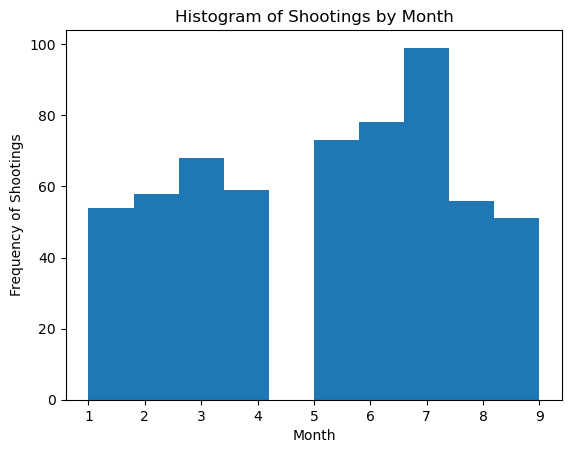

In [5]:
plt.hist(df['MONTH'].values)
plt.title("Histogram of Shootings by Month")
plt.xlabel("Month")
plt.ylabel("Frequency of Shootings")
plt.show()

This block of code was executed to provide a count of crimes separated by Month. 

In [7]:
month_map ={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
            9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['MONTH'] = df['MONTH'].replace(month_map)
df['MONTH'].value_counts()

Jul    99
Jun    78
May    73
Mar    68
Apr    59
Feb    58
Aug    56
Jan    54
Sep    51
Name: MONTH, dtype: int64

There is a spike in shooting incidents during the Summer and Spring and a sharp decline in incidents in the Winter and Fall. As seen above, the most frequency was seen in July and June, and the least frequency was seen in April and January. There is a high correlation between higher temperatures and increased aggression. There are also more outdoor activities which increases the chances of confrontations. There is also no school in the summer, meaning the unsupervised youth can engage in gang activity and other forms of juvenile delinquency.  

Which boroughs have the highest number of shooting incidents during the year of 2023? 

This block of code breaks down the crime data into percentages by Borough, (i.e. 28.06% of the Shooting Incidents occurred in Brooklyn)

In [8]:
df['BORO'].value_counts(normalize=True)*100

BRONX            40.100671
BROOKLYN         28.187919
MANHATTAN        15.100671
QUEENS           13.926174
STATEN ISLAND     2.684564
Name: BORO, dtype: float64

kAccording to the data the majority of shooting in the city for the year of 2023 takes place in the Bronx followed by Brooklyn. As per the data majority of shooting incidents involve Black victims and according to US census data Bronx and Brooklyn has a largest population of Black people throughout the city. https://www.census.gov/quickfacts/fact/table/richmondcountynewyork,bronxcountynewyork,queenscountynewyork,newyorkcountynewyork,kingscountynewyork/RHI225222

*Time Analysis: Are shooting incidents more frequent during specific times of the day or week? How do occurrences vary between daytime and nighttime? 

The code below first breaks down the time of day the crime was committed either into Daytime (6AM-6PM) and Nighttime (7PM-5AM). Next, in order to break down the data into a line graph representing the frequency of shooting incidents we first, changed the format of the time shown from 24hr time to AM-PM time. In doing so, the data would be much easier to represent on a graph. After having done so we plotted a line graph with the data, which represents how often crime was committed throughout the day. 

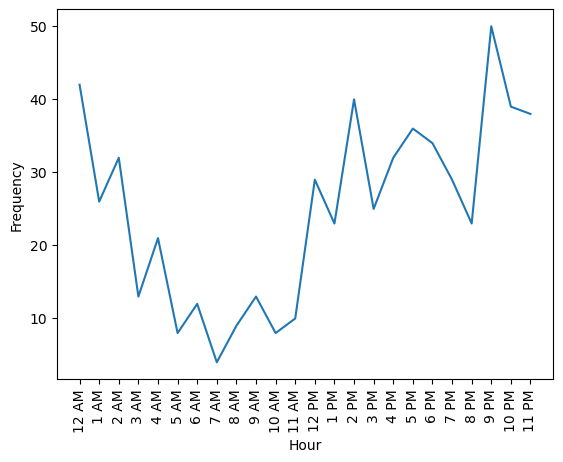


Time of Day Frequency:
Nighttime    355
Daytime      241
Name: time_of_day, dtype: int64


In [9]:
#James
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S', errors='coerce')
df['hour'] = df['OCCUR_TIME'].dt.hour


def categorize_time_of_day(hour):    
    if 6 <= hour < 18:        
        return 'Daytime'    
    else:        
        return 'Nighttime'

df['time_of_day'] = df['hour'].apply(categorize_time_of_day)
def format_hour(hour):
    if hour == 0:
        return '12 AM'
    elif hour < 12:
        return f'{hour} AM'
    elif hour == 12:
        return '12 PM'
    else:
        return f'{hour - 12} PM'

hourly_frequency = df['hour'].value_counts().sort_index()
time_of_day_frequency = df['time_of_day'].value_counts()
hourly_frequency.index = [format_hour(hour) for hour in hourly_frequency.index]
time_of_day_frequency.index = ['Daytime' if time_of_day == 'Daytime' else 'Nighttime' for time_of_day in time_of_day_frequency.index]

hourly_frequency.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(len(hourly_frequency.index)), hourly_frequency.index, rotation=90)
plt.show()

print("\nTime of Day Frequency:")
print(time_of_day_frequency)


Shooting incidents are most frequent at Night and on Saturdays. There is a large spike in shooting incidents starting at 9 PM peaking 10 PM with a drastic decline in shooting incidents at 3 AM. Wednesday and Thursday had the least amount of shootings in our data, while Saturdays and Sundays had the most. 

Here we presented the data with Season and Borough in mind, and represented each Borough with different colored lines, and had each season represented on the x-axis.

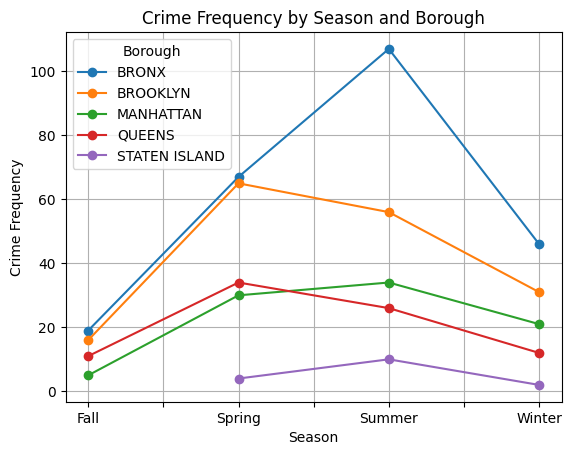

In [ ]:
#Daniel, Max
pivot_table = df.pivot_table(index='SEASON', columns='BORO', aggfunc='size')


pivot_table.plot(kind='line', marker='o', linestyle='-')


plt.title('Crime Frequency by Season and Borough')
plt.xlabel('Season')
plt.ylabel('Crime Frequency')
plt.legend(title='Borough', loc='upper left')
plt.grid(True)
plt.show()


We clearly see that both variables of Season and Borough are the biggest influences on frequency of shooting incidents. Overall, we have found that Summer and Spring are the seasons with the highest frequency of shootings, and the Bronx and Brooklyn are the two boroughs with the highest frequency of shootings. When combined in one graph as such, our concurrent findings are made crystal clear.  

Victim and Perpetrator Demographics: What are the common age groups, genders, and races of victims and perpetrators in these incidents? Are there noticeable differences in the demographics of victims versus perpetrators?

Here we create two functions one to categorize and group the victims by their age group based off the information in the VIC_AGE_GROUP column, and a second function to categorize whether the victim was killed in the incident as well. Then we apply these functions to the dataframe and create new columns. From there we count the occurrence of each of the categories age group, killed, sex, and race. Finally we print these results.

In [ ]:
#Max
#Victim Analysis

def categorize_age(age):
    if age=='<18'or age=='18-24':
        return 'Young'
    elif age=='25-44':
        return 'Middle Age'
    elif age=='45-64' or '65+':
        return 'Senior'

def categorize_death_age(age,death):
    if death == 'Y':
        if age=='<18'or age=='18-24':
            return 'Young'
        elif age=='25-44':
            return 'Middle Age'
        elif age=='45-64' or '65+':
            return 'Senior'


df['Age of Victims'] = df['VIC_AGE_GROUP'].apply(categorize_age)
df['Age of Killed Victims'] = df.apply(lambda row: categorize_death_age(row['VIC_AGE_GROUP'],row['STATISTICAL_MURDER_FLAG']),axis=1)
age_groups = df['Age of Victims'].value_counts().sort_index()
killed_age_groups = df['Age of Killed Victims'].value_counts().sort_index()

victim_gender = df['VIC_SEX'].value_counts().sort_index()
#df['Sex of Killed Victims'] = df.apply(lambda row: (row['VIC_SEX'],row['STATISTICAL_MURDER_FLAG']))
victim_race = df['VIC_RACE'].value_counts().sort_index()



print('Number of Victims Grouped by Age')
print(age_groups)
print('Number of Killed Victims Grouped by Age')
print(killed_age_groups)
print('Victims Categorized by Sex')
print(victim_gender)
print('Victims Categorized by Race')
print(victim_race)





Number of Victims Grouped by Age
Middle Age    315
Senior         82
Young         199
Name: Age of Victims, dtype: int64
Number of Killed Victims Grouped by Age
Middle Age    92
Senior        24
Young         43
Name: Age of Killed Victims, dtype: int64
Victims Categorized by Sex
F     74
M    522
Name: VIC_SEX, dtype: int64
Victims Categorized by Race
AMERICAN INDIAN/ALASKAN NATIVE      1
ASIAN / PACIFIC ISLANDER           19
BLACK                             361
BLACK HISPANIC                     75
UNKNOWN                             1
WHITE                              14
WHITE HISPANIC                    125
Name: VIC_RACE, dtype: int64


We categorized Victims into three groups, 'Middle Age' representative of 25-44 years old, 'Senior' representative of 45 and older, and 'Young' representative of 24 years old and younger. Our findings found that the highest frequency was found in the 'Middle Age' group regarding the number of victims in shooting incidents as well as victims killed by said shooting incidents. The finding was concurrent with our thoughts as victims that are shot are often fighting the perpetrator, as well as the fact that the 'Middle Age' people are the most likely to be out, or available to be shot. Disregarding the idea that shootings may be premeditated, in random encounters, you need to be outside to be shot. 

We also found that males are much more likely to be shot at more than 8 times the rate. 

We also found that victims were most often Black, then White Hispanic. 

How often do shooting incidents result in fatalities? Are there specific patterns or trends related to fatal shootings in terms of location, time, or demographics?

We group the dataframe by the borough and murder flag(whether the victim was killed in the incident) and then display the information as a pivot table.

In [ ]:
#Daniel, James
statistical_summary = df.groupby(['BORO', 'STATISTICAL_MURDER_FLAG']).size().reset_index(name='count')

statistical_summary_pivot = statistical_summary.pivot_table(index='BORO', columns='STATISTICAL_MURDER_FLAG', values='count', fill_value=0)

statistical_summary_pivot['Y_percent'] = (statistical_summary_pivot['Y'] / (statistical_summary_pivot['Y'] + statistical_summary_pivot['N'])) * 100
statistical_summary_pivot['N_percent'] = (statistical_summary_pivot['N'] / (statistical_summary_pivot['Y'] + statistical_summary_pivot['N'])) * 100

print("Statistical Summary:")
statistical_summary_pivot[['Y', 'N', 'Y_percent', 'N_percent']]


Statistical Summary:


STATISTICAL_MURDER_FLAG,Y,N,Y_percent,N_percent
BORO,,,,
BRONX,64,175,26.778243,73.221757
BROOKLYN,48,120,28.571429,71.428571
MANHATTAN,28,62,31.111111,68.888889
QUEENS,15,68,18.072289,81.927711
STATEN ISLAND,4,12,25.000000,75.000000


Based on the data we can see the highest percentage of fatal shootings that occurred in NYC boroughs. More shootings have happened in Brooklyn and the Bronx but with less murder percentage. But overall there is less percentage of murder happening.

Is there a variance in the frequency of shooting incidents that occur in a particular season during the year compared to the entire year?

Here we separated the original dataframe into four separate dataframes and create a line multi-line plot to show if there is a variance in the frequencies of the shooting incidents based of the season. 

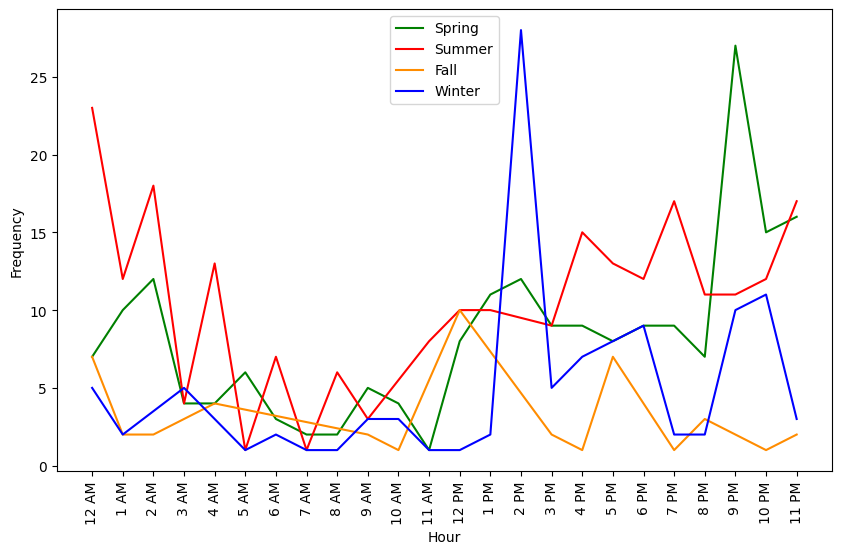

In [ ]:
#Man Loan
summerDf = df[df['SEASON'].str.lower() == 'summer']
fallDf = df[df['SEASON'].str.lower() == 'fall']
winterDf = df[df['SEASON'].str.lower() == 'winter']
springDf = df[df['SEASON'].str.lower() == 'spring']

plt.figure(figsize=(10,6))
springDf['hour'].value_counts().sort_index().plot(kind='line', label='Spring',color='green')
summerDf['hour'].value_counts().sort_index().plot(kind='line', label='Summer',color='red')
fallDf['hour'].value_counts().sort_index().plot(kind='line',label='Fall',color='darkorange')
winterDf['hour'].value_counts().sort_index().plot(kind='line',label='Winter',color='blue')

plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(len(hourly_frequency.index)), hourly_frequency.index, rotation=90)
plt.legend(loc='upper center')
plt.show()

From this graph we can see that the peak occurrence of shooting incidents in the city tends to occur in the afternoon during fall and winter. While the peak occurrence of shooting incidents tend to occur between 9PM and 12AM for spring and summer. This is surprising from our time frequency analysis of shooting incidents we could see there is a spike in incidents from 1 PM to 3 PM can solely be contributed to shooting incidents that occurred during the winter.  

This block of code groups the dataframe by borough and the description of the location of the incident occurrence, than calculating the percentage of the occurrence of each location, and then print out the results 

In [ ]:
#James
location_summary = df.groupby(['BORO', 'LOC_OF_OCCUR_DESC']).size().unstack(fill_value=0)
location_percentage = location_summary.div(location_summary.sum(axis=1), axis=0) * 100
print("Location Summary:")
location_percentage

Location Summary:


LOC_OF_OCCUR_DESC,INSIDE,OUTSIDE
BORO,,
BRONX,17.154812,82.845188
BROOKLYN,22.619048,77.380952
MANHATTAN,16.666667,83.333333
QUEENS,16.867470,83.132530
STATEN ISLAND,12.500000,87.500000


From the data we can see that a majority of shooting incidents occur outside of as oppose to inside of buildings. 

Relationship with Special Events: Do shooting incidents increase during major events or holidays in New York City, such as New Year's Eve, Fourth of July, or large public gatherings?

In this block we create a dictionary of major US holidays. then iterate through the OCCUR_DATE column in the dataframe creating a new column flagging whether or not the date is in the dictionary. Lastly it averages and prints out the number of incidents on event dates and non-event days. 

In [ ]:
#Daniel
# Define major event dates (example dates here, replace with actual dates)
major_events = {
    'New Year\'s Day': '2023-01-01',
    'Fourth of July': '2023-07-04',
    'Labor Day':'2023-09-04',
    'Juneteenth':'2023-06-19',
    'Memorial Day':'2023-05-29',
    'President\'s Day':'2023-02-20',
    'Columbus Day':'2023-10-09',
    'St. Patricks Day':'2023-03-17'
    # Add other events as needed
}

# Convert event dates to datetime and flag rows that fall on these dates
for event, date in major_events.items():
    event_date = pd.to_datetime(date)
    df[event] = df['OCCUR_DATE'] == event_date

# Analyze the data
# Calculate the average incidents on event days vs. non-event days
average_on_event_days = df[list(major_events.keys())].sum().mean()
average_on_non_event_days = (len(df) - df[list(major_events.keys())].sum().sum()) / (len(df) - len(major_events))

# Print results
print("Average incidents on major event days:", average_on_event_days)
print("Average incidents on non-event days:", average_on_non_event_days)

# Further analysis can be done to check statistical significance


Average incidents on major event days: 2.0
Average incidents on non-event days: 0.9863945578231292


According to the data occurrence of shooting incidents are two times more likely to occur during major events/ holidays in NYC. From this information as well as our analysis of temporal trends, which shows that shootings are more likely to occur during the summer, we can infer that shootings are more likely to occur when people have more ability to come into contact with each other.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df56140f-4493-496f-9466-d93aa8d32ab3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>